In [1]:
import pandas as pd

In [2]:
import numpy as nm

In [3]:
data = pd.read_csv("../raw_data/monster_com-job_sample.csv")

data.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [4]:
data.isnull().count()

country            22000
country_code       22000
date_added         22000
has_expired        22000
job_board          22000
job_description    22000
job_title          22000
job_type           22000
location           22000
organization       22000
page_url           22000
salary             22000
sector             22000
uniq_id            22000
dtype: int64

In [5]:
!pip install unidecode
!pip install --upgrade gensim

import string
import unidecode
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [6]:
def clean (text):
    
    text_urless=re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', text)
    
    for punctuation in string.punctuation:
        text = text_urless.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
          
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return without_stopwords #" ".join(without_stopwords)

In [7]:
data["clean_description"] = data["job_description"].apply(clean)
data['clean_description']

0        [teamsoft, seeing, support, specialist, join, ...
1        [wisconsin, state, journal, seeking, flexible,...
2        [report, job, job, depuy, synthes, companies, ...
3        [join, altec, considering, career, altec, neve...
4        [position, id, positions, state, ct, city, fai...
                               ...                        
21995    [major, premier, cincinnati, based, financial,...
21996    [luxury, homebuilder, cincinnati, seeking, acc...
21997    [adobe, client, location, anywhere, would, pre...
21998    [jernberg, industries, established, considered...
21999    [contract, administratorcan, point, person, di...
Name: clean_description, Length: 22000, dtype: object

In [8]:
# Masculine-coded words
masc_vocab=["active",
"adventurous",
"aggress",
"ambitio",
"analy",
"assert",
"athlet",
"autonom",
"battle",
"boast",
"challeng",
"champion",
"compet",
"confident",
"courag",
"decid",
"decision",
"decisive",
"defend",
"determin",
"domina",
"dominant",
"driven",
"fearless",
"fight",
"force",
"greedy",
"head-strong",
"headstrong",
"hierarch",
"hostil",
"impulsive",
"independen",
"individual",
"intellect",
"lead",
"logic",
"objective",
"opinion",
"outspoken",
"persist",
"principle",
"reckless",
"self-confiden",
"self-relian",
"self-sufficien",
"selfconfiden",
"selfrelian",
"selfsufficien",
"stubborn",
"superior",
"unreasonab"]

In [9]:
# Feminine,coded words
fem_vocab=["agree",
"affectionate",
"child",
"cheer",
"collab",
"commit",
"communal",
"compassion",
"connect",
"considerate",
"cooperat",
"co-operat",
"depend",
"emotiona",
"empath",
"feel",
"flatterable",
"gentle",
"honest",
"interpersonal",
"interdependen",
"interpersona",
"inter-personal",
"inter-dependen",
"inter-persona",
"kind",
"kinship",
"loyal",
"modesty",
"nag",
"nurtur",
"pleasant",
"polite",
"quiet",
"respon",
"sensitiv",
"submissive",
"support",
"sympath",
"tender",
"together",
"trust",
"understand",
"warm",
"whin",
"enthusias",
"inclusive",
"yield",
"share",
"sharin"]

In [10]:
from gensim.models import Word2Vec

word2vec_description = Word2Vec(sentences=data['clean_description'], vector_size=10, min_count=1)

In [11]:
word2vec_description.wv['team']

array([ 0.9157916 ,  1.3892854 , -0.3380346 , -2.1382093 ,  0.1183129 ,
        7.3834667 ,  2.332649  , -0.0547799 ,  0.47479272,  7.2756944 ],
      dtype=float32)

In [12]:
def masc_similar_words(text):
    simil_masc_vocab = []
    match_masc_vocab = []

    n_simil_masc = 0
    n_match_masc = 0

    for word in text:
        for masc_word in masc_vocab:
            if masc_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, masc_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, masc_word) < 0.99:
                    n_simil_masc += 1
                    simil_masc_vocab.append((word, masc_word))
                    simil_masc_vocab = list(dict.fromkeys(simil_masc_vocab))
            if word.find(masc_word) == 0:
                n_match_masc += 1
                match_masc_vocab.append((word, masc_word))
                match_masc_vocab = list(dict.fromkeys(match_masc_vocab))
    print(simil_masc_vocab, match_masc_vocab)
    return (n_simil_masc + n_match_masc)

In [13]:
def fem_similar_words(text):
    simil_fem_vocab = []
    match_fem_vocab = []

    n_simil_fem = 0
    n_match_fem = 0

    for word in text:        
        for fem_word in fem_vocab:
            if fem_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, fem_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, fem_word) < 0.99:
                    n_simil_fem += 1
                    simil_fem_vocab.append((word, fem_word))
                    simil_fem_vocab = list(dict.fromkeys(simil_fem_vocab))
            if word.find(fem_word) == 0:
                n_match_fem += 1
                match_fem_vocab.append((word, fem_word))
                match_fem_vocab = list(dict.fromkeys(match_fem_vocab))
    print(simil_fem_vocab, match_fem_vocab)
    return (n_simil_fem + n_match_fem)

In [73]:
def label_gender (row):
    if row['fem_coded'] > 0.55:
        return 'feminine'
    elif row['fem_coded'] < 0.45:
        return 'masculine'
    else:
        return 'neutral'

In [15]:
import gensim.downloader
glove_wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

In [16]:
from nltk.stem import PorterStemmer  
ps = PorterStemmer()

In [17]:
extended_masc = []

masc_word = 'share'
match_masc = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(masc_word) == 0]
match_masc = list(dict.fromkeys(match_masc))
for match in match_masc:
    for index in range(2):
        extended_masc.append(match)
        extended_masc.append(glove_wiki_vectors.most_similar(match, topn=10)[index][0])

print(match_masc, extended_masc)

['shares', 'share', 'shared', 'shareholders', 'shareholder', 'shareholding', 'sharemarket', 'shareholdings', 'shareef', 'shareware', 'sharecroppers', 'sharecropper', 'shareh', 'sharepoint', 'sharer', 'sharers', 'sharecropping', 'shareowners', 'sharetsky', 'sharen', 'sharett', 'sharelink', 'sharemarkets', 'shareowner', 'shareable', 'shared-use', 'shareprices', 'shared-time', 'shareaza', 'sharee', 'sharenow', 'shareware.com', 'shareeka', 'share-alike'] ['shares', 'stock', 'shares', 'share', 'share', 'shares', 'share', 'stock', 'shared', 'both', 'shared', 'own', 'shareholders', 'stockholders', 'shareholders', 'shareholder', 'shareholder', 'shareholders', 'shareholder', 'stockholder', 'shareholding', 'ownership', 'shareholding', 'shareholdings', 'sharemarket', 'stockmarket', 'sharemarket', 'closes', 'shareholdings', 'shareholding', 'shareholdings', 'stockholdings', 'shareef', 'abdur', 'shareef', 'rahim', 'shareware', 'freeware', 'shareware', 'open-source', 'sharecroppers', 'farmhands', 'sh

In [18]:
extended_fem_vocab = []

for fem_word in fem_vocab:
    match_fem_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(fem_word) == 0]
    match_fem_words = list(dict.fromkeys(match_fem_words))
    for match_fem_word in match_fem_words:
        for index in range(3):
            extended_fem_vocab.append(match_fem_word)
            extended_fem_vocab.append(glove_wiki_vectors.most_similar(match_fem_word, topn=10)[index][0])

extended_fem_vocab = list(dict.fromkeys(extended_fem_vocab))
extended_fem_vocab

['agreement',
 'accord',
 'agreements',
 'deal',
 'agreed',
 'agree',
 'decided',
 'accept',
 'willing',
 'accords',
 'treaties',
 'agrees',
 'refuses',
 'decides',
 'wants',
 'agreeing',
 'negotiate',
 'agreeable',
 'amicable',
 'congenial',
 'amiable',
 'agreeably',
 'entertainingly',
 'unconventionally',
 'unpleasantly',
 'agreed-upon',
 'unheard-of',
 'pre-set',
 'industry-standard',
 'agreeement',
 'agremeent',
 'agrement',
 'free-trade',
 'agreeableness',
 'conscientiousness',
 'extraversion',
 'neuroticism',
 'affectionately',
 'derisively',
 'disparagingly',
 'colloquially',
 'affectionate',
 'playful',
 'respectful',
 'sardonic',
 'children',
 'child',
 'parents',
 'mothers',
 'mother',
 'childhood',
 'experiences',
 'adolescence',
 'childs',
 'starks',
 'kidd',
 'gardner',
 'childbirth',
 'pregnancy',
 'complications',
 'pregnancies',
 'childless',
 'unmarried',
 'widowed',
 'remarried',
 'childress',
 'penske',
 'roush',
 'harvick',
 'childish',
 'mischievous',
 'pathetic',


In [19]:
extended_masc_vocab = []

for masc_word in masc_vocab:
    match_masc_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(masc_word) == 0]
    match_masc_words = list(dict.fromkeys(match_masc_words))
    for match_masc_word in match_masc_words:
        for index in range(3):
            extended_masc_vocab.append(match_masc_word)
            extended_masc_vocab.append(glove_wiki_vectors.most_similar(match_masc_word, topn=10)[index][0])
            
extended_masc_vocab = list(dict.fromkeys(extended_masc_vocab))
extended_masc_vocab

['active',
 'engaged',
 'most',
 'primarily',
 'actively',
 'aggressively',
 'encouraged',
 'active-duty',
 'usaf',
 'f-15s',
 'f-4s',
 'activex',
 'applets',
 'antipiracy',
 'plugin',
 'actives',
 'torvolt',
 'species-rich',
 'châteaux',
 'activewear',
 'haberdashery',
 'sportwear',
 'casualwear',
 'activesync',
 'webdav',
 'cadivi',
 'oauth',
 'activeness',
 'nobleness',
 'rapaciousness',
 'heedlessness',
 'activehybrid',
 'e38',
 'e23',
 'wedi',
 'adventurous',
 'adventuresome',
 'imaginative',
 'inventive',
 'adventurousness',
 'oddness',
 'precociousness',
 'tenaciousness',
 'adventurously',
 'ecumenically',
 'circumspectly',
 'invasively',
 'aggressive',
 'tough',
 'vigorous',
 'aggression',
 'aggressions',
 'provocations',
 'provocation',
 'vigorously',
 'relentlessly',
 'aggressiveness',
 'tenacity',
 'boldness',
 'toughness',
 'aggressor',
 'aggressors',
 'adversary',
 'enemy',
 'oppressors',
 'occupiers',
 'brutalities',
 'aggressivity',
 'apodosis',
 'bodhicitta',
 'riff-raf

In [20]:
for fem_word in fem_vocab:
    for masc_word in extended_masc_vocab:
        if masc_word.find(fem_word) != -1:
            extended_masc_vocab.remove(masc_word)
            # print(fem_word, masc_word)

In [21]:
for masc_word in masc_vocab:
    for fem_word in extended_fem_vocab:
        if fem_word.find(masc_word) != -1:
            extended_fem_vocab.remove(fem_word)
            # print(masc_word, fem_word)

In [22]:
test = data['clean_description'][2]

In [23]:
def fem_words(text):
    n_fem_words = 0
    
    for word in text:
        if word in extended_fem_vocab:
            # print(word)
            n_fem_words += 1

    return n_fem_words

fem_words(test)

17

In [24]:
def masc_words(text):
    n_masc_words = 0
    
    for word in text:
        if word in extended_masc_vocab:
            # print(word)
            n_masc_words += 1

    return n_masc_words

masc_words(test)

20

In [25]:
def fem_masc_words(text):
    n_masc_words = 0
    n_fem_words = 0
    
    for word in text:
        if word in extended_masc_vocab:
            # print(word)
            n_masc_words += 1
        if word in extended_fem_vocab:
            # print(word)
            n_fem_words += 1
            
    return n_fem_words, n_masc_words

In [26]:
fem_similar_words(test)

[('unparalleled', 'trust'), ('skills', 'interpersonal'), ('good', 'interpersonal'), ('strong', 'interpersonal'), ('excellent', 'interpersonal'), ('communication', 'interpersonal')] [('support', 'support'), ('responsibilities', 'respon'), ('collaboration', 'collab'), ('responsible', 'respon'), ('understands', 'understand'), ('understanding', 'understand')]


18

In [27]:
masc_similar_words(test)

[('raynham', 'headstrong'), ('raynham', 'intellect'), ('project', 'lead'), ('people', 'confident'), ('locationunited', 'outspoken')] [('leader', 'lead'), ('leads', 'lead'), ('objectives', 'objective'), ('leadership', 'lead')]


14

In [28]:
data['masc_words'] = data['clean_description'][0:22000].apply(masc_words)

In [29]:
data['fem_words'] = data['clean_description'][0:22000].apply(fem_words)

In [67]:
data['masc_coded'] = data['masc_words']/(data['masc_words'] + data['fem_words'] + 0.0001)
data['fem_coded'] = data['fem_words']/(data['masc_words'] + data['fem_words'] + 0.0001)
data['gender'] = data.apply (lambda row: label_gender(row), axis=1)
data[0:22000].round(2)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"[teamsoft, seeing, support, specialist, join, ...",6,19,0.24,0.76,feminine
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"[wisconsin, state, journal, seeking, flexible,...",3,2,0.60,0.40,masculine
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"[report, job, job, depuy, synthes, companies, ...",20,17,0.54,0.46,neutral
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"[join, altec, considering, career, altec, neve...",17,21,0.45,0.55,feminine
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"[position, id, positions, state, ct, city, fai...",10,22,0.31,0.69,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,"[major, premier, cincinnati, based, financial,...",19,27,0.41,0.59,feminine
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,"[luxury, homebuilder, cincinnati, seeking, acc...",0,3,0.00,1.00,feminine
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,"[adobe, client, location, anywhere, would, pre...",1,0,1.00,0.00,masculine
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,"[jernberg, industries, established, considered...",9,3,0.75,0.25,masculine


In [31]:
data.to_csv('../basemodel_df_new.csv', encoding='utf-8')

In [32]:
glove_wiki_vectors.similarity('man', 'defend')

0.34896258

In [33]:
glove_wiki_vectors.similarity('woman', 'defend')

0.31202987

In [34]:
data.isnull().sum()

country                  0
country_code             0
date_added           21878
has_expired              0
job_board                0
job_description          0
job_title                0
job_type              1628
location                 0
organization          6867
page_url                 0
salary               18554
sector                5194
uniq_id                  0
clean_description        0
masc_words               0
fem_words                0
masc_coded               0
fem_coded                0
gender                   0
dtype: int64

In [35]:
data.iloc[[9566]]

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
9566,United States of America,US,NaN,No,jobs.monster.com,Compu-Net Systems has an immediate opening for...,IT Support Technician,Full Time,"North Ridgeville, OH 44039",Computer Hardware,http://jobview.monster.com/IT-Support-Technici...,"19.00 - 30.00 $ /hourMedical, Vacation, Holiday",Experienced (Non-Manager),a4bf249af9bd4c5032e2e488f9c285af,"[systems, immediate, opening, support, enginee...",6,10,0.374998,0.624996,feminine


In [37]:
df = pd.DataFrame()

In [49]:
df['masc_fem_words'] = data['clean_description'][0:2].apply(fem_masc_words)

In [52]:
df[['masc_words', 'fem_words']] = pd.DataFrame(df['masc_fem_words'].tolist(), index=df.index)

In [53]:
df

,b1,b2,masc_fem_words,masc_words,fem_words
0,19,6,"(19, 6)",19,6
1,2,3,"(2, 3)",2,3


In [54]:
test

['report',
 'job',
 'job',
 'depuy',
 'synthes',
 'companies',
 'member',
 'johnson',
 'johnson',
 'family',
 'companies',
 'recruiting',
 'senior',
 'training',
 'leader',
 'located',
 'raynham',
 'synthes',
 'companies',
 'johnson',
 'johnson',
 'largest',
 'innovative',
 'comprehensive',
 'orthopedic',
 'neurological',
 'business',
 'world',
 'depuy',
 'synthes',
 'companies',
 'offer',
 'unparalleled',
 'breadth',
 'depth',
 'products',
 'services',
 'programs',
 'areas',
 'joint',
 'reconstruction',
 'trauma',
 'spine',
 'sports',
 'medicine',
 'neurological',
 'craniomaxillofacial',
 'power',
 'tools',
 'biomaterials',
 'building',
 'legacy',
 'strengths',
 'two',
 'great',
 'companies',
 'agile',
 'better',
 'equipped',
 'meet',
 'needs',
 'today',
 'evolving',
 'health',
 'care',
 'environment',
 'focus',
 'activating',
 'insights',
 'develop',
 'innovative',
 'comprehensive',
 'solutions',
 'inspired',
 'advance',
 'patient',
 'care',
 'greater',
 'ways',
 'either',
 'company'

In [55]:
def fem_masc_word_list(text):
    n_masc_words = 0
    n_fem_words = 0
    
    fem_words = []
    masc_words = []
    
    for word in text:
        if word in extended_masc_vocab:
            masc_words.append(word)
            # print(word)
            n_masc_words += 1
        if word in extended_fem_vocab:
            fem_words.append(word)
            # print(word)
            n_fem_words += 1
            
    return n_fem_words, n_masc_words, masc_words, fem_words

In [56]:
fem_masc_word_list(test)

(17,
 20,
 ['leader',
  'innovative',
  'innovative',
  'leader',
  'leads',
  'objectives',
  'research',
  'major',
  'achieve',
  'data',
  'methodology',
  'documents',
  'data',
  'leads',
  'successful',
  'summarize',
  'documents',
  'methodology',
  'leadership',
  'based'],
 ['innovative',
  'innovative',
  'support',
  'responsibilities',
  'responsibilities',
  'duties',
  'consults',
  'duties',
  'responsibilities',
  'collaboration',
  'support',
  'responsible',
  'knowledge',
  'understands',
  'support',
  'knowledge',
  'understanding'])

In [58]:
data['job_description'].iloc[2]

'Report this job About the Job DePuy Synthes Companies is a member of Johnson & Johnson\'s Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of joint reconstruction, trauma, spine, sports medicine, neurological, craniomaxillofacial, power tools and biomaterials. Building on the legacy and strengths of two great companies, more agile and better equipped to meet the needs of today’s evolving health care environment. With a focus on activating insights to develop innovative, comprehensive solutions, we are inspired to advance patient care in greater ways than either company could accomplish on its own.Position Overview• The Training Leader leads the site training function to develop and implemen

<AxesSubplot:>

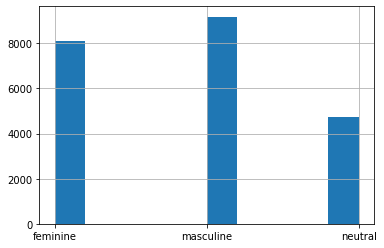

In [68]:
data['gender'].hist()

In [72]:
df = pd.read_csv("../raw_data/basemodel_df_greg.csv")

df.head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,"['border', 'patrol', 'agents', 'prevent', 'ter...",11,10,52.0,48.0,neutral
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,"['gap', 'brands', 'bridge', 'gaps', 'see', 'wo...",16,13,55.0,45.0,neutral
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,"['county', 'san', 'diego', 'invites', 'resumes...",5,3,62.0,37.0,masculine
3,3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA","['application', 'deadline', 'application', 'de...",0,0,0.0,0.0,masculine
4,4,job_6dc51c91cb582a3e,https://www.indeed.com/company/SafeStreetsUSA/...,"Sacramento, CA 95811 (Midtown - Winn Park Capi...",SafeStreetsUSA,newAPPRENTICE NEEDED ASAP,SafeStreets is the largest provider of ADT sec...,https://www.indeed.com/cmp/SafeStreetsUSA,"['safestreets', 'largest', 'provider', 'adt', ...",0,1,0.0,100.0,feminine


<AxesSubplot:>

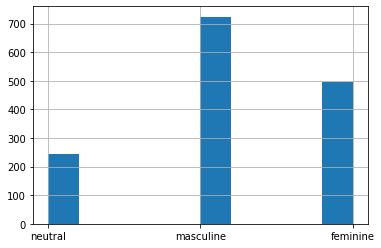

In [70]:
df['gender'].hist()